# Programming Assignment: Build a CNN for image recognition.

### Name: Brianna Cirillo


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accuracy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.


4. Upload the .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. On Canvas, submit the Google Drive/Dropbox/Github link to the HTML file.


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [12]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [13]:
def to_one_hot(y, num_class=10):
    # Initialize a zero matrix of shape (n, 10)
    one_hot = numpy.zeros((y.shape[0], 10))

    # Set the appropriate indices to 1
    for i in range(y.shape[0]):
        one_hot[i, y[i]] = 1

    return one_hot

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [14]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark:

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [15]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras import optimizers

# Define the model architecture
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [16]:
from keras import optimizers

learning_rate = 0.0001

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=learning_rate),
    metrics=['acc']
)

In [17]:
# Train the model on the entire training set (50,000 samples)
history = model.fit(x_tr, y_tr, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 425s 338ms/step - acc: 0.2634 - loss: 2.6437 - val_acc: 0.3876 - val_loss: 1.8983
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 418s 319ms/step - acc: 0.4249 - loss: 1.7888 - val_acc: 0.5185 - val_loss: 1.4204
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 441s 318ms/step - acc: 0.5069 - loss: 1.4665 - val_acc: 0.5835 - val_loss: 1.2188
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 435s 313ms/step - acc: 0.5630 - loss: 1.2960 - val_acc: 0.6340 - val_loss: 1.0817
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 442s 313ms/step - acc: 0.6092 - loss: 1.1370 - val_acc: 0.6515 - val_loss: 1.0129
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 437s 309ms/step - acc: 0.6439 - loss: 1.0307 - val_acc: 0.6818 - val_loss: 0.9201
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 443s 310ms/step - acc: 0.6646 - loss: 0.9551 - val_acc: 0.6860 - val_loss: 0.9190
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 447s 314ms/step - acc: 0.6966 - loss: 0.8821 - val_acc: 0.6929 - val_loss: 0.8999
Epoch 9/

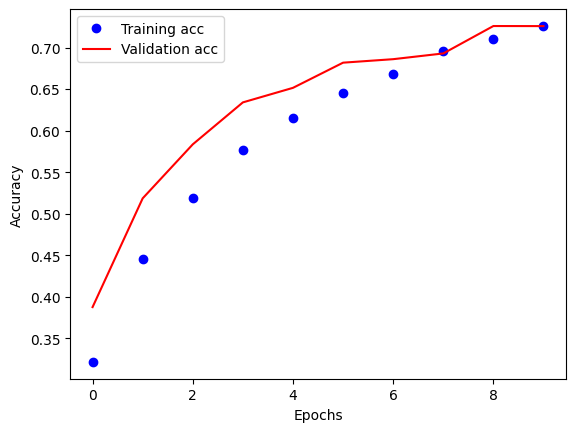

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
from keras import optimizers
from keras.optimizers import Adam

learning_rate = 0.0001 # to be tuned!

model.compile(
    optimizer=Adam(learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 398s 312ms/step - accuracy: 0.7369 - loss: 0.7492 - val_accuracy: 0.7491 - val_loss: 0.7156
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 438s 309ms/step - accuracy: 0.7492 - loss: 0.7128 - val_accuracy: 0.7623 - val_loss: 0.6725
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 445s 311ms/step - accuracy: 0.7614 - loss: 0.6902 - val_accuracy: 0.7685 - val_loss: 0.6578
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 444s 313ms/step - accuracy: 0.7800 - loss: 0.6371 - val_accuracy: 0.7755 - val_loss: 0.6435
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 386s 309ms/step - accuracy: 0.7847 - loss: 0.6192 - val_accuracy: 0.7832 - val_loss: 0.6326
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 439s 307ms/step - accuracy: 0.7906 - loss: 0.5995 - val_accuracy: 0.7851 - val_loss: 0.6207
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 387s 310ms/step - accuracy: 0.7992 - loss: 0.5691 - val_accuracy: 0.7946 - val_loss: 0.5956
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 384s 308ms/step - ac

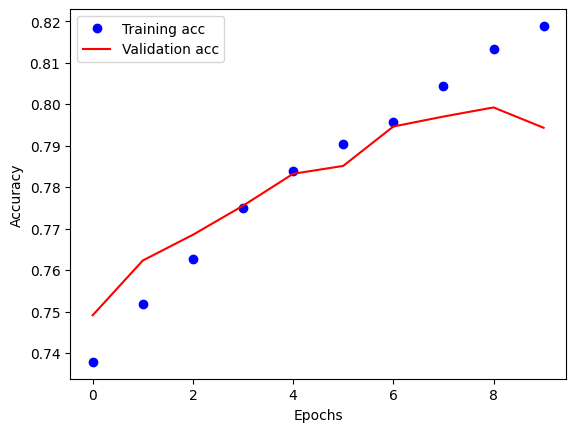

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters.
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [30]:
# Compile your model again (using the same hyper-parameters)
model.compile(
    optimizer=Adam(learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [31]:
# Train your model on the entire training set (50K samples)
# Use (x_train, y_train_vec) instead of (x_tr, y_tr)
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 464s 293ms/step - accuracy: 0.8066 - loss: 0.5561
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 510s 298ms/step - accuracy: 0.8246 - loss: 0.5085
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 465s 298ms/step - accuracy: 0.8299 - loss: 0.4927
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 499s 296ms/step - accuracy: 0.8346 - loss: 0.4754
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 502s 296ms/step - accuracy: 0.8412 - loss: 0.4593
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 503s 296ms/step - accuracy: 0.8463 - loss: 0.4449
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 497s 293ms/step - accuracy: 0.8489 - loss: 0.4344
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 503s 294ms/step - accuracy: 0.8575 - loss: 0.4130
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 461s 295ms/step - accuracy: 0.8550 - loss: 0.4131
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 503s 296ms/step - accuracy: 0.8616 - loss: 0.3924


### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [32]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.8325 - loss: 0.5037
loss = 0.5051817893981934
accuracy = 0.8334000110626221
